# 1.1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
print('n° istanze: ', df.shape[0])

n° istanze:  2000


In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: ylabel='price_range'>

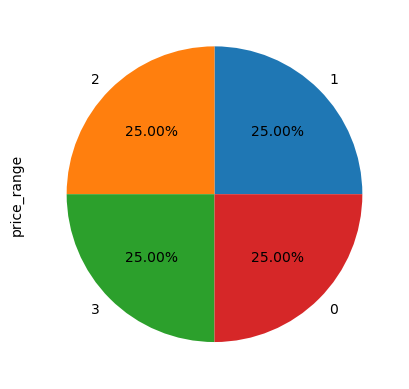

In [9]:
df['price_range'].value_counts().plot(kind='pie', autopct='%.2f%%')

## 1.2


In [10]:
df['sc_w'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2000 entries, 0 to 1999
Series name: sc_w
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 15.8 KB


df['sc_w'] ha val di tipo int64, è discreta

In [24]:
tel_costosi = df.loc[df['price_range'] >1]

tel_economici = df.loc[df['price_range'] <=1]

In [23]:
tel_costosi['sc_w'].mean()

5.921

In [25]:
tel_economici['sc_w'].mean()

5.613

In [40]:
tel_costosi = tel_costosi.loc[tel_costosi['sc_w'] != 0]
tel_economici = tel_economici.loc[tel_economici['sc_w'] != 0]


In [41]:
tel_costosi['sc_w'].mean()


6.456924754634678

In [42]:
tel_economici['sc_w'].mean()

6.21594684385382

i telefoni costosi hanno una larghezza maggiore di quelli economici in media

## 1.3

In [26]:
tel_costosi['battery_power'].mean()

1304.152

In [27]:
tel_economici['battery_power'].mean()

1172.885

Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione dei valori di battery power per ogni categoria.

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

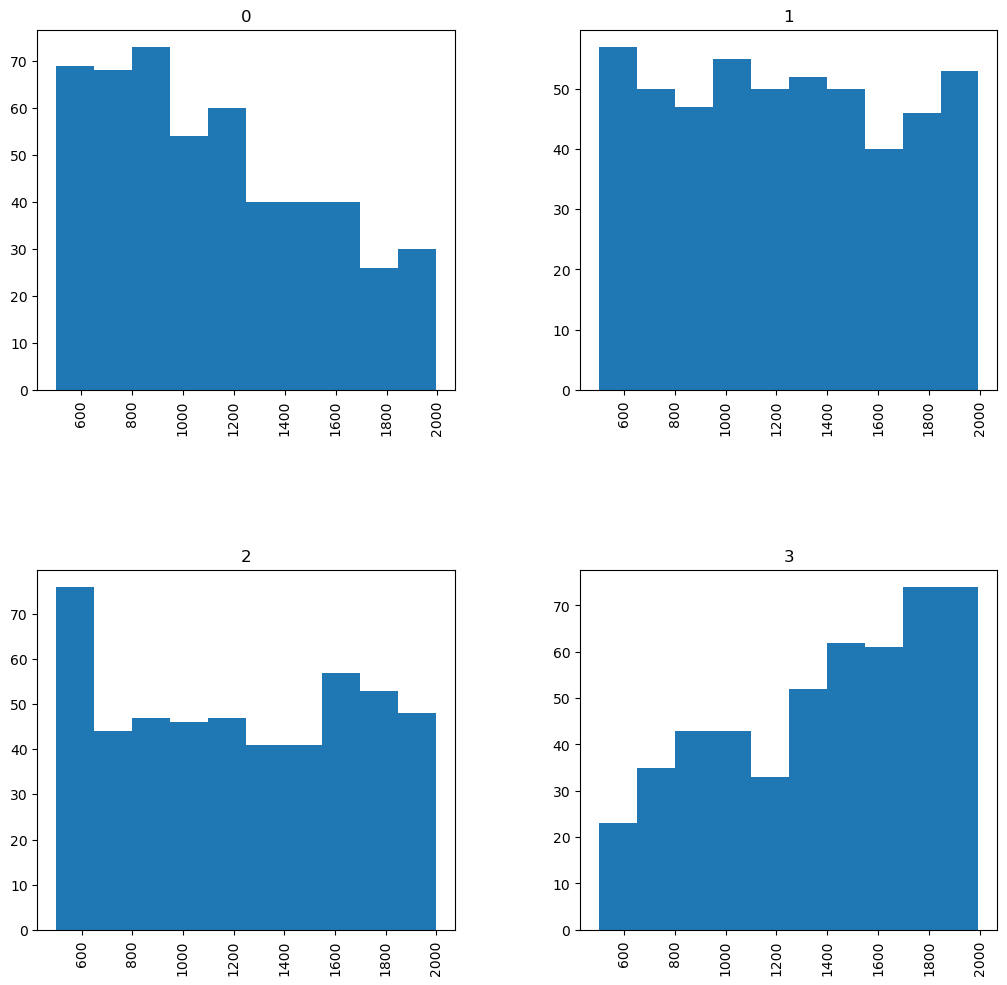

In [35]:
# 4 plot di istogrammi di bTTery power per ogni price range
df['battery_power'].hist(by=df['price_range'], figsize=(12, 12), bins=10)

## 1.4

In [44]:
#tel con 4g
four_g = df.loc[df['four_g'] == 1]
#tel 4g senza 3g
four_g.loc[four_g['three_g'] == 0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [45]:
four_g.shape

(1043, 21)

In [47]:
four_g.loc[four_g['three_g'] == 1].shape

(1043, 21)

tutti i tel con il 4g hanno anche il 3g

## 1.5

In [49]:
# 4g senza wifi e bleutooth
four_g.loc[(four_g['wifi'] == 0) & (four_g['blue'] == 0)].shape

(263, 21)

# Parte 2



In [50]:
#trasformatori e pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
#metriche e modelli
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LinearRegression


#funzione per calcolare confusion matrix e il report
def plot_confusion_matrix(confusion_matrix):
    cm = confusion_matrix
    # Calcolo dei conteggi non normalizzati
    group_counts = ["{0:0.0f}\n({1:0.2%})".format(value, value/np.sum(cm)) for value in cm.flatten()]

    # Calcolo dei conteggi normalizzati
    group_percentages = ["{0:.2%}\n({1:0.0f})".format(value, value*np.sum(cm)) for value in cm.flatten()/np.sum(cm)]

    # Trasformazione dei conteggi in una matrice quadrata
    labels = np.asarray(group_counts).reshape(cm.shape[0],cm.shape[1])

    plot = sns.heatmap(cm, annot = labels, fmt='', cmap='Blues')
    plot.set_title('Confusion Matrix')
    plot.set_ylabel('True class')
    plot.set_xlabel('Predicted class')
    plt.show()


def gridSearch(model, param_grid, cv, X_train, y_train, X_test, y_test): #works also with pipelines
    clf = GridSearchCV(model, param_grid, cv=cv)
    clf.fit(X_train, y_train)
    print('best parameters: ', clf.best_params_)
    print('with accuracy: ', clf.best_score_)
    print()
    model.set_params(**clf.best_params_)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_pred_train)
    print('acc sul train del modello con i parametri ottimizzati: ', acc_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('acc del modello con i parametri ottimizzati: : ', acc)
    print('--------------------------------------------------------------------')
    return model


# def compareModels(model_list, X_train, y_train, X_test, y_test):
#     for m in model_list:
#         m.fit(X_train, y_train)
#         y_pred_train = m.predict(X_train)
#         y_pred = m.predict(X_test)
#         print(m)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         cm = confusion_matrix(y_test, y_pred)
#         plot_confusion_matrix(cm)
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')

#prende in input un modello o una lista di modelli e fa il cross validation
def crossValidation(model,cv, X, y):
        cross_val = cross_val_score(m, X, y, cv = cv, scoring = 'accuracy') 
        print(model)
        # print()
        print('cross validation scores: ', cross_val)
        # print()
        # print('accuracy media', cross_val.mean())
        # print()
        print("Accuracy con incertezza: %0.2f (+/- %0.2f)" % (cross_val.mean(), cross_val.std() * 2))
        print('--------------------------------------------------------------------')
        return model



# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
def  testModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    print('--------------------------------------------------------------------')    
    return model

# allena il modello su X_train e y_train
# stampa l'accuracy sul train e sul test
# stampa la confusion matrix e il classification report
def testModelWithConfusionMatrix(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    print(model)
    print('accuracy train: ', accuracy_score(y_train, y_pred_train))
    print('accuracy test: ', accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print()
    print('--------------------------------------------------------------------')
    print('classification report: ')
    print()
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------------------')

# input d'esempio 
# models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]
# pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler), ('models_list', models)])
# def testPipelineOnModels(pipeline, models_list, X_train, y_train, X_test, y_test):
#     for m in models_list:
#         print(m)
#         pipeline.fit(X_train, y_train)
#         y_pred_train = pipeline.predict(X_train)
#         y_pred = pipeline.predict(X_test)
#         print('accuracy train: ', accuracy_score(y_train, y_pred_train))
#         print('accuracy: ', accuracy_score(y_test, y_pred))
#         print()
#         print()
#         print('classification report: ', classification_report(y_test, y_pred))

#         print('--------------------------------------------------------------------')
  

# per fare il feature union fra il dataset originale e le nuove colonne da aggiungere
def identity(X):
  return X
identity = FunctionTransformer(identity, validate=True)

#trasforma le colonne categoriche in numeriche con ordinal encoder
def categoricalToNumerical(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    data = dt.copy()
    oe = OrdinalEncoder()
    data[categorical_columns] = oe.fit_transform(data[categorical_columns])
    data = pd.DataFrame(data, columns = dt.columns)
    return data

# ritorna lista delle colonne categoriche di un dataframe dato in input
def categoricalColumns(dt):
    categorical_columns = dt.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns

# ritorna lista delle colonne numeriche di un dataframe dato in input
def numericalColumns(dt):
    numerical_columns = dt.select_dtypes(include=['int64', 'float64']).columns.tolist()
    return numerical_columns


## 2.1

In [51]:
df.shape

(2000, 21)

In [58]:
dataset = df.loc[(df['sc_w'] != 0) & (df['sc_h'] != 0)]

dataset.shape



(1820, 21)

In [60]:
X = dataset.drop(['price_range'], axis = 1)
y = dataset['price_range']
#shape
print(X.shape, y.shape)

(1820, 20) (1820,)


In [61]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

LogisticRegression(solver='liblinear')
accuracy train:  0.7838827838827839
accuracy test:  0.7428571428571429


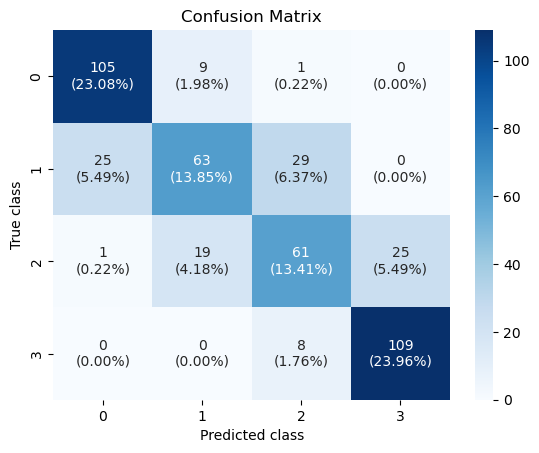


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       115
           1       0.69      0.54      0.61       117
           2       0.62      0.58      0.60       106
           3       0.81      0.93      0.87       117

    accuracy                           0.74       455
   macro avg       0.73      0.74      0.73       455
weighted avg       0.73      0.74      0.73       455

--------------------------------------------------------------------
DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.8


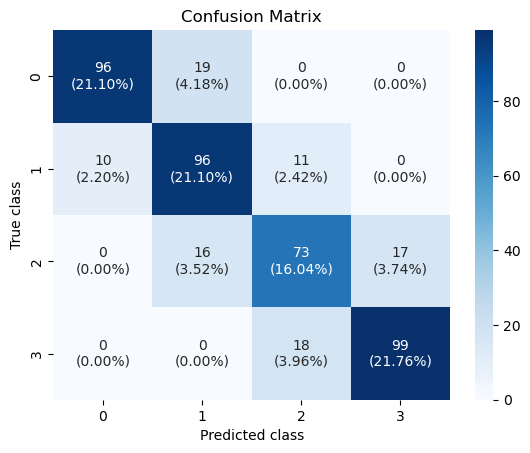


--------------------------------------------------------------------
classification report: 

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       115
           1       0.73      0.82      0.77       117
           2       0.72      0.69      0.70       106
           3       0.85      0.85      0.85       117

    accuracy                           0.80       455
   macro avg       0.80      0.80      0.80       455
weighted avg       0.80      0.80      0.80       455

--------------------------------------------------------------------


In [62]:
models = [LogisticRegression(solver = 'liblinear'), DecisionTreeClassifier()]

for m in models:
    testModelWithConfusionMatrix(m, X_train, y_train, X_test, y_test)


## 2.2

In [63]:
for m in models:
    crossValidation(m, 10, X, y)

LogisticRegression(solver='liblinear')
cross validation scores:  [0.79120879 0.77472527 0.76373626 0.74175824 0.82967033 0.76923077
 0.76923077 0.77472527 0.75824176 0.77472527]
Accuracy con incertezza: 0.77 (+/- 0.04)
--------------------------------------------------------------------
DecisionTreeClassifier()
cross validation scores:  [0.81868132 0.84615385 0.82417582 0.84615385 0.82967033 0.85714286
 0.84615385 0.86263736 0.87362637 0.83516484]
Accuracy con incertezza: 0.84 (+/- 0.03)
--------------------------------------------------------------------


## 2.3

In [70]:
# GridSearch per DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'], 
                'max_features': ['sqrt', 'log2'],
                'min_samples_split': [2, 4, 6]
}

gridSearch(DecisionTreeClassifier(), param_grid, 3, X_train, y_train, X_test, y_test)

best parameters:  {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 2}
with accuracy:  0.6901098901098902

acc sul train del modello con i parametri ottimizzati:  1.0
acc del modello con i parametri ottimizzati: :  0.6197802197802198
--------------------------------------------------------------------


DecisionTreeClassifier(max_features='log2')

In [101]:
scaler = MaxAbsScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns = scaler.get_feature_names_out() )
X_scaled.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.421421,0.0,0.733333,0.0,0.052632,0.0,0.109375,0.6,0.940,0.250,0.10,0.010204,0.378378,0.637569,0.473684,0.388889,0.95,0.0,0.0,1.0
1,0.511011,1.0,0.166667,1.0,0.000000,1.0,0.828125,0.7,0.680,0.375,0.30,0.461735,0.994995,0.658079,0.894737,0.166667,0.35,1.0,1.0,0.0
2,0.281782,1.0,0.166667,1.0,0.105263,1.0,0.640625,0.9,0.725,0.625,0.30,0.644388,0.858859,0.651076,0.578947,0.111111,0.45,1.0,1.0,0.0
3,0.307808,1.0,0.833333,0.0,0.000000,0.0,0.156250,0.8,0.655,0.750,0.45,0.620408,0.893894,0.692596,0.842105,0.444444,0.55,1.0,0.0,0.0
4,0.911411,1.0,0.400000,0.0,0.684211,1.0,0.687500,0.6,0.705,0.250,0.70,0.616327,0.606607,0.352926,0.421053,0.111111,0.75,1.0,1.0,0.0


In [72]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size = 1/4, random_state = 0)

In [73]:
testModel(DecisionTreeClassifier(), X_train_scaled, y_train, X_test_scaled, y_test)

DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.8219780219780219
--------------------------------------------------------------------


DecisionTreeClassifier()

In [75]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [108]:
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

col_trasf = ColumnTransformer([('discretizer', discretizer, ['ram'])], remainder='passthrough')
# colonne del column trasformer


ct = col_trasf.fit_transform(X)

ct

array([[2.000e+00, 8.420e+02, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+00, 1.021e+03, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 5.630e+02, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [2.000e+00, 1.911e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 1.512e+03, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [3.000e+00, 5.100e+02, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [109]:
columns = col_trasf.get_feature_names_out()
columns

array(['discretizer__ram', 'remainder__battery_power', 'remainder__blue',
       'remainder__clock_speed', 'remainder__dual_sim', 'remainder__fc',
       'remainder__four_g', 'remainder__int_memory', 'remainder__m_dep',
       'remainder__mobile_wt', 'remainder__n_cores', 'remainder__pc',
       'remainder__px_height', 'remainder__px_width', 'remainder__sc_h',
       'remainder__sc_w', 'remainder__talk_time', 'remainder__three_g',
       'remainder__touch_screen', 'remainder__wifi'], dtype=object)

In [110]:
X_discretized = pd.DataFrame(ct, columns = columns)
X_discretized.head()

,discretizer__ram,remainder__battery_power,remainder__blue,remainder__clock_speed,remainder__dual_sim,remainder__fc,remainder__four_g,remainder__int_memory,remainder__m_dep,remainder__mobile_wt,remainder__n_cores,remainder__pc,remainder__px_height,remainder__px_width,remainder__sc_h,remainder__sc_w,remainder__talk_time,remainder__three_g,remainder__touch_screen,remainder__wifi
0,2.0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,9.0,7.0,19.0,0.0,0.0,1.0
1,2.0,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,17.0,3.0,7.0,1.0,1.0,0.0
2,2.0,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,11.0,2.0,9.0,1.0,1.0,0.0
3,2.0,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,16.0,8.0,11.0,1.0,0.0,0.0
4,1.0,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,8.0,2.0,15.0,1.0,1.0,0.0


In [111]:
X_train_discretized, X_test_discretized, y_train, y_test = train_test_split(X_discretized, y, test_size = 1/4, random_state = 0)


In [112]:
testModel(DecisionTreeClassifier(), X_train_discretized, y_train, X_test_discretized, y_test)

DecisionTreeClassifier()
accuracy train:  1.0
accuracy test:  0.7516483516483516
--------------------------------------------------------------------


DecisionTreeClassifier()

In [113]:
# discretizzo in 4 bin ram e in 10 battery_power

col_trasf = ColumnTransformer([('discretize_ram', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ['ram']),
                              ('discretize_battery_power', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['battery_power'])],
                               remainder='passthrough')

In [114]:
# scalo i valori con maxabs scaler, normalizzo i valori con Normalizer
scaler = MaxAbsScaler()
normalizer = Normalizer()
model = DecisionTreeClassifier()

In [117]:
pipeline = Pipeline(steps=[('col_trasf', col_trasf), ('scaler', scaler),('normalizer', Normalizer() ), ('model', model)])
pipeline

Pipeline(steps=[('col_trasf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretize_ram',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4,
                                                                   strategy='uniform'),
                                                  ['ram']),
                                                 ('discretize_battery_power',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform'),
                                                  ['battery_power'])])),
                ('scaler', MaxAbsScaler()), ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])

In [118]:
testModel(pipeline, X_train, y_train, X_test, y_test)

Pipeline(steps=[('col_trasf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretize_ram',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4,
                                                                   strategy='uniform'),
                                                  ['ram']),
                                                 ('discretize_battery_power',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform'),
                                                  ['battery_power'])])),
                ('scaler', MaxAbsScaler()), ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])
ac

Pipeline(steps=[('col_trasf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discretize_ram',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=4,
                                                                   strategy='uniform'),
                                                  ['ram']),
                                                 ('discretize_battery_power',
                                                  KBinsDiscretizer(encode='ordinal',
                                                                   n_bins=10,
                                                                   strategy='uniform'),
                                                  ['battery_power'])])),
                ('scaler', MaxAbsScaler()), ('normalizer', Normalizer()),
                ('model', DecisionTreeClassifier())])